In [31]:
#  import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#  import data
data = pd.read_csv('../Project_datasets/feature_dataset.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436577 entries, 0 to 436576
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       436577 non-null  int64  
 1   user_id                          436577 non-null  int64  
 2   product_id                       436577 non-null  int64  
 3   total_cost_pennies               436577 non-null  int64  
 4   source                           436577 non-null  int64  
 5   total_cost_pre_discount_pennies  436577 non-null  int64  
 6   discount%                        436577 non-null  float64
 7   campaign_id                      436577 non-null  int64  
 8   sent_at                          436577 non-null  object 
 9   name_campaigns                   436577 non-null  int64  
 10  opened_email                     436577 non-null  int64  
 11  purchase                         436577 non-null  int64  
 12  la

Purchase distribution:
0    413926
1     22651
Name: purchase, dtype: int64

Purchase percentage:
0    94.811683
1     5.188317
Name: purchase, dtype: float64


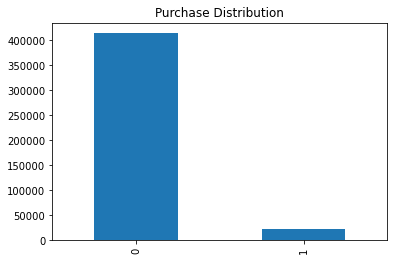

In [29]:
# Check balance of the main target variable
print("Purchase distribution:")
print(data['purchase'].value_counts())
print("\nPurchase percentage:")
print(data['purchase'].value_counts(normalize=True) * 100)

# Visual check
data['purchase'].value_counts().plot(kind='bar')
plt.title('Purchase Distribution')
plt.show()

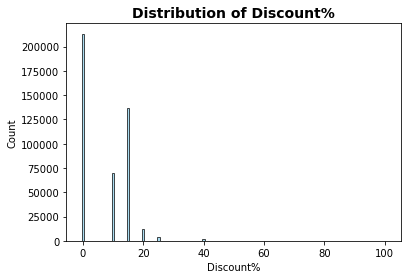

In [30]:
discount_counts = data['discount%'].value_counts().sort_index()

plt.bar(discount_counts.index, discount_counts.values, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Discount%', fontsize=14, fontweight='bold')
plt.xlabel('Discount%')
plt.ylabel('Count')
plt.show()


In [28]:
# Calculate the distribution
discount_distribution = (data['discount%'].value_counts(normalize=True) * 100).sort_index().round(2)

# Convert to dataframe and rename columns
discount = discount_distribution.reset_index()
discount.columns = ['discount', 'ratio']

discount.head(4)


,discount,ratio
0,0.0,48.86
1,9.0,0.00
2,10.0,15.95
3,12.0,0.01


#### Balanced the target values purchases with saving the discount distribution

In [34]:
import pandas as pd

# Get the target count (same as "yes" purchases)
target_count = 22651

# Filter non-purchase rows
non_purchase_data = data_raw[data_raw['purchase'] == 0].copy()
purchase_data = data_raw[data_raw['purchase'] == 1].copy()

# Calculate how many samples to take from each discount group
discount_df['target_samples'] = (discount_df['ratio'] / 100 * target_count).round().astype(int)

# Sample from each discount group
sampled_dfs = []
for _, row in discount_df.iterrows():
    discount_val = row['discount']
    n_samples = int(row['target_samples'])
    
    if n_samples > 0:
        discount_group = non_purchase_data[non_purchase_data['discount%'] == discount_val]
        if len(discount_group) >= n_samples:
            sampled = discount_group.sample(n=n_samples, random_state=42)
            sampled_dfs.append(sampled)

# Combine all sampled non-purchase data
sampled_non_purchase = pd.concat(sampled_dfs, ignore_index=True)

# Combine with all purchase data
balanced_data = pd.concat([sampled_non_purchase, purchase_data], ignore_index=True)

print(f"Sampled non-purchase count: {len(sampled_non_purchase)}")
print(f"Purchase count: {len(purchase_data)}")
print(f"Final dataset: {len(balanced_data)}")

Sampled non-purchase count: 22649
Purchase count: 22651
Final dataset: 45300


In [35]:
balanced_data.to_csv('../Project_datasets/balanced_dataset.csv')